In [1]:
from google.colab import drive
drive.mount('/content/drive')
mypath = '/content/drive/MyDrive/'

Mounted at /content/drive


In [4]:
import pandas as pd
ted = pd.read_csv(mypath+'ted_main.csv')

In [30]:
import matplotlib.pyplot as plt
dur = ted['duration']

In [31]:
import math
import numpy as np
from tqdm import tqdm
class Parzen:
    def __init__(self, h=1.0):
        self.h = h
    
    def fit(self, X):
        self.X = X
        self.n = len(X)
        
    def calc_prob(self, data):
        prob = []
        for x in tqdm(data):
            temp = [abs(np.sqrt((math.pi)*2) * (1/self.h)* np.exp((-1/2)*((x-xi)/self.h)**2)) for xi in self.X]
            prob.append((sum(temp)[0]/self.n))
        
        return prob

In [27]:
x_d = np.linspace(0,5000,5000)
dur = np.array(dur)
p10 = Parzen(h=10)
p10.fit(dur[:,None])

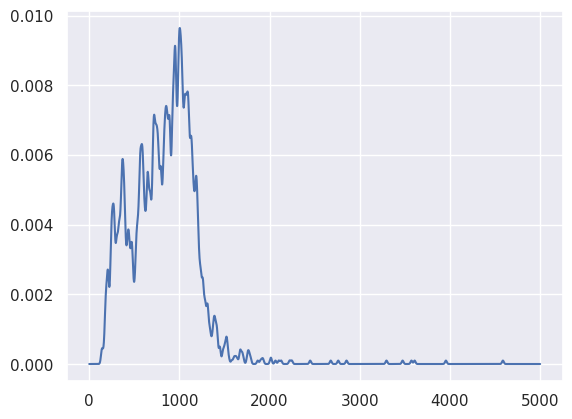

In [56]:
prob10 = p10.calc_prob(x_d[:,None])
plt.plot(x_d,np.array(prob10))
plt.show()

In [ ]:
p20 = Parzen(h=20)
p20.fit(dur[:,None])
prob20 = p20.calc_prob(x_d[:,None])
p50 = Parzen(h=50)
p50.fit(dur[:,None])
p100 = Parzen(h=100)
p100.fit(dur[:,None])
prob100 = p100.calc_prob(x_d[:,None])
prob50 = p50.calc_prob(x_d[:,None])

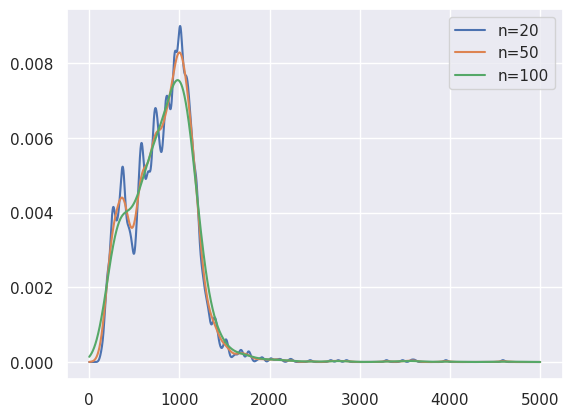

In [60]:
plt.plot(x_d,np.array(prob20), label="n=20")
plt.plot(x_d,np.array(prob50), label="n=50")
plt.plot(x_d,np.array(prob100), label="n=100")
plt.legend()
plt.show()

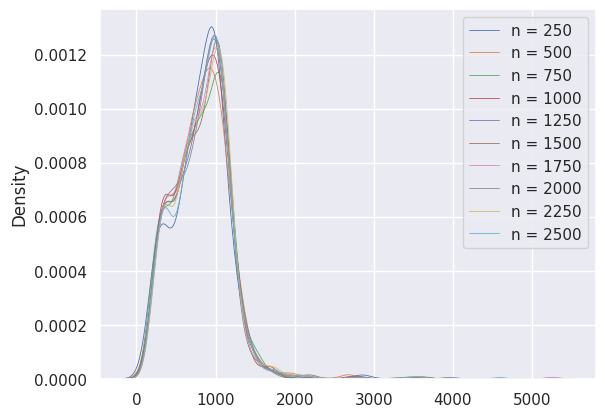

In [83]:
import seaborn as sns, numpy as np
import random
sns.set()
np.random.seed(0)
for n in range(250,2501,250):
  sns.kdeplot(data=random.choices(dur,k=n), label='n = '+str(n), linewidth = 0.6)
plt.legend()
plt.show()

<ipython-input-82-d1c568d14f16>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  kdf.fit(dur[:,None])


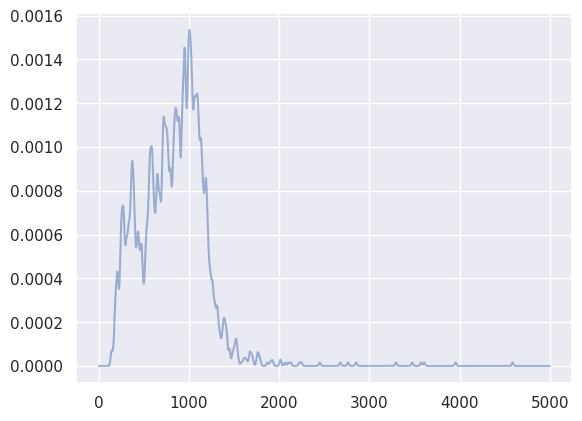

In [82]:
from sklearn.neighbors import KernelDensity
kdf = KernelDensity(bandwidth=10,kernel='gaussian')
kdf.fit(dur[:,None])
sklprob10 = kdf.score_samples(x_d[:,None])
plt.plot(x_d,np.exp(sklprob10),alpha = 0.5)
plt.show()